# --------------------------------------------------------------------------------

 <h2 style="color:blue;">  DATA 3550 Fall 2023 Final Project </h2>
 
  * Professor Ramchandra Rimal
  * Nicholas Sartino (M00392300) 

# --------------------------------------------------------------------------------

Suppose you are an employee of the insurance company. Your goal is to analyze and learn from the data and inform the management about the following:

1) The better way to predict the amount of a quote for insurance and the most important features that help to determine the quote

2) The better way to assess risk (because the goal of a company is to make a profit)

# Installs and Imports

## Installs

In [187]:
# !pip install --upgrade scikit-learn
# !pip install geoplotlib
# !pip-install missingno
# !pip install seaborn

## Imports

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
from scipy.stats import zscore
import datetime as dt
from datetime import timedelta

from sklearn.preprocessing import LabelEncoder

from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import statsmodels.api as sm
from sklearn.feature_selection import SelectFromModel

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

from sklearn.pipeline import make_pipeline, Pipeline

from numpy import arange
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_ridge import KernelRidge


from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc, plot_roc_curve

# Trick to widen the screen
from IPython.core.display import display, HTML

#Widens the code landscape 
display(HTML("<style>.container { width:95% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows', 50)
sns.set_style('whitegrid')


ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/Users/nicksartino/anaconda3/envs/Jupyter/lib/python3.11/site-packages/sklearn/metrics/__init__.py)

In [189]:
#import geoplotlib
#import plotly
#import dash

#import dash_core_components as dcc
#import dash_html_components as html
#from dash.dependencies import Input, Output
#import plotly.graph_objects as go

In [190]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Loading and Data Transformation

## Loading the Abilitech dataset 

In [215]:
df_Abilitech = pd.read_csv('Dataset/df_AP02.csv', header=0)

In [216]:
df_Abilitech.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96501 entries, 0 to 96500
Data columns (total 300 columns):
 #    Column                                                                                                                      Dtype  
---   ------                                                                                                                      -----  
 0    AbilitecContactID                                                                                                           object 
 1    ACX_ZIPCODE                                                                                                                 int64  
 2    ACX_ZIP4                                                                                                                    float64
 3    AP004913_Average_Monthly_Expenditure_For_Credit_Cards_Was_Greater_Than_2001_Fin_rank_base_20_AP004913                       float64
 4    AP004916_Have_An_Average_Monthly_Debit_Card_Expenditure_

In [217]:
df_Abilitech.head()

,AbilitecContactID,ACX_ZIPCODE,ACX_ZIP4,AP004913_Average_Monthly_Expenditure_For_Credit_Cards_Was_Greater_Than_2001_Fin_rank_base_20_AP004913,AP004916_Have_An_Average_Monthly_Debit_Card_Expenditure_Of_181_To_225_Fin_rank_base_20_AP004916,AP004921_Never_Or_Rarely_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004921,AP004922_Sometimes_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004922,AP004923_Usually_Or_Always_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004923,AP004924_Have_Accepted_Pre_Approved_Credit_Card_Offer_In_Past_12_Months_Fin_rank_base_20_AP004924,AP004925_Have_Used_Credit_Cards_For_Business_Purposes_Fin_rank_base_20_AP004925,AP004926_Have_Used_Credit_Cards_For_Personal_Purposes_Fin_rank_base_20_AP004926,AP004927_Use_A_Debit_Card_For_Personal_Use_Less_Than_Once_Per_Month_Fin_rank_base_20_AP004927,AP004928_Have_Used_Credit_Cards_For_Personal_Purchases_More_Than_20_Times_Per_Month_Fin_rank_base_20_AP004928,AP004929_Have_Used_Credit_Cards_For_Personal_Purchases_Between_11_20_Times_Per_Month_Fin_rank_base_20_AP004929,AP004930_Have_Used_Credit_Cards_For_Personal_Purchases_Between_6_10_Times_Per_Month_Fin_rank_base_20_AP004930,AP004931_Have_Used_Credit_Cards_For_Personal_Purchases_Between_1_5_Times_Per_Month_Fin_rank_base_20_AP004931,AP004932_Have_Used_Credit_Cards_For_Personal_Purchases_Less_Than_One_Time_Per_Month_Fin_rank_base_20_AP004932,AP004933_Use_A_Debit_Card_For_Personal_Use_More_Than_20_Times_Per_Month_Fin_rank_base_20_AP004933,AP004934_Use_A_Debit_Card_For_Personal_Use_Between_11_20_Times_Per_Month_Fin_rank_base_20_AP004934,AP004935_Use_A_Debit_Card_For_Personal_Use_Between_6_10_Times_Per_Month_Fin_rank_base_20_AP004935,AP004936_Use_A_Debit_Card_For_Personal_Use_Between_1_5_Times_Per_Month_Fin_rank_base_20_AP004936,AP004937_Have_Personal_Or_Joint_Home_Mortgage_1St_Fin_rank_base_20_AP004937,AP004938_Have_Acquired_Personal_Joint_Home_Mortgage_1St_In_Past_12_Months_Fin_rank_base_20_AP004938,AP004939_Have_Personal_Or_Joint_2Nd_Mortgage_Home_Equity_Loan_Fin_rank_base_20_AP004939,AP004940_Have_Personal_Or_Joint_Mortgage_Refinance_Consolidation_Loan_Fin_rank_base_20_AP004940,AP004941_Have_Personal_Or_Joint_Auto_Loan_Fin_rank_base_20_AP004941,AP004942_Have_Acquired_Personal_Joint_Auto_Loan_In_Past_12_Months_Fin_rank_base_20_AP004942,AP004943_Have_Personal_Or_Joint_Education_Student_Loan_Fin_rank_base_20_AP004943,AP004944_Have_Personal_Or_Joint_Loan_Not_For_Education_Purposes_Fin_rank_base_20_AP004944,AP004945_Have_Personal_Or_Joint_Personal_Line_Of_Credit_Fin_rank_base_20_AP004945,AP004946_Have_Personal_Or_Joint_Home_Equity_Line_Of_Credit_Fin_rank_base_20_AP004946,AP004947_Household_Owns_A_Vacation_Weekend_Home_Fin_rank_base_20_AP004947,AP004948_Household_Owns_Real_Estate_For_Investment_Purposes_Fin_rank_base_20_AP004948,AP004949_Household_Owns_Any_Type_Of_Real_Estate_Fin_rank_base_20_AP004949,AP004950_Household_Own_One_Vacation_Weekend_Home_Fin_rank_base_20_AP004950,AP004951_Household_Owns_One_Property_For_Real_Estate_Investment_Fin_rank_base_20_AP004951,AP004952_Household_Used_A_Real_Estate_Agent_To_Sell_A_Property_Fin_rank_base_20_AP004952,AP004953_Household_Used_A_Real_Estate_Agent_To_Buy_A_Property_Fin_rank_base_20_AP004953,AP004954_Household_Used_A_Real_Estate_Agent_Fin_rank_base_20_AP004954,AP004955_Household_Used_Other_Type_Of_Real_Estate_Agent_Fin_rank_base_20_AP004955,AP004958_Personal_Or_Joint_Savings_Account_Fin_rank_base_20_AP004958,AP004959_Acquired_A_Saving_Account_In_Past_12_Months_Fin_rank_base_20_AP004959,AP004960_Personal_Or_Joint_Cd_Certificate_Of_Deposit_Account_Fin_rank_base_20_AP004960,AP004961_Personal_Or_Joint_Interest_Checking_Account_Fin_rank_base_20_AP004961,AP004962_Acquired_An_Interest_Checking_Account_In_Past_12_Months_Fin_rank_base_20_AP004962,AP004963_Personal_Or_Joint_Non_Interest_Checking_Account_Fin_rank_base_20_AP004963,AP004964_Acquired_A_Non_Interest_Checking_Account_In_Past_12_Months_Fin_rank_base_20_AP004964,AP004965_Personal_Or_Joint_Moneymarket_Account_Fin_r

# Loading the MasterQuote dataset

In [218]:
# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("Current Working Directory:", current_directory)

Current Working Directory: /Users/nicksartino/Code/Final-Project-3550


In [219]:
# Read in data 
# Make sure the directory from the above Get Current Working Directory code is included below

df_MasterQuote = pd.read_csv('Dataset/MasterQuote.csv', header = 0)

In [220]:
# Create copy for Label Encoder method
df_MasterQuote_LE = df_MasterQuote.copy()

In [221]:
# Merge to Abilitec

# Convert 'AbilitecContactID' to the same data type in MasterQuote

df_MasterQuote_LE['AbilitecContactID'] = df_MasterQuote_LE['AbilitecContactID'].astype(str)

merged_MQ_df = pd.merge(df_MasterQuote_LE, df_Abilitech, on='AbilitecContactID', how='left')

# Now, inspect the merged DataFrame
merged_MQ_df.head()

,QuoteNumber,MQuotedTotalPayment,BiFcCoverageInd,CoverageTypeDescription,DriversActive,GaragingState,NamedInsuredMaritalStatus,PolicyNumber,PolicyStateCode,PolicyTerm,QuoteInitiatedTime,TermEffectiveDate,TermExpirationDate,AbilitecContactID,DriverNumber,AbilitecHouseholdID,DriverCount,ACX_ZIPCODE,ACX_ZIP4,AP004913_Average_Monthly_Expenditure_For_Credit_Cards_Was_Greater_Than_2001_Fin_rank_base_20_AP004913,AP004916_Have_An_Average_Monthly_Debit_Card_Expenditure_Of_181_To_225_Fin_rank_base_20_AP004916,AP004921_Never_Or_Rarely_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004921,AP004922_Sometimes_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004922,AP004923_Usually_Or_Always_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004923,AP004924_Have_Accepted_Pre_Approved_Credit_Card_Offer_In_Past_12_Months_Fin_rank_base_20_AP004924,AP004925_Have_Used_Credit_Cards_For_Business_Purposes_Fin_rank_base_20_AP004925,AP004926_Have_Used_Credit_Cards_For_Personal_Purposes_Fin_rank_base_20_AP004926,AP004927_Use_A_Debit_Card_For_Personal_Use_Less_Than_Once_Per_Month_Fin_rank_base_20_AP004927,AP004928_Have_Used_Credit_Cards_For_Personal_Purchases_More_Than_20_Times_Per_Month_Fin_rank_base_20_AP004928,AP004929_Have_Used_Credit_Cards_For_Personal_Purchases_Between_11_20_Times_Per_Month_Fin_rank_base_20_AP004929,AP004930_Have_Used_Credit_Cards_For_Personal_Purchases_Between_6_10_Times_Per_Month_Fin_rank_base_20_AP004930,AP004931_Have_Used_Credit_Cards_For_Personal_Purchases_Between_1_5_Times_Per_Month_Fin_rank_base_20_AP004931,AP004932_Have_Used_Credit_Cards_For_Personal_Purchases_Less_Than_One_Time_Per_Month_Fin_rank_base_20_AP004932,AP004933_Use_A_Debit_Card_For_Personal_Use_More_Than_20_Times_Per_Month_Fin_rank_base_20_AP004933,AP004934_Use_A_Debit_Card_For_Personal_Use_Between_11_20_Times_Per_Month_Fin_rank_base_20_AP004934,AP004935_Use_A_Debit_Card_For_Personal_Use_Between_6_10_Times_Per_Month_Fin_rank_base_20_AP004935,AP004936_Use_A_Debit_Card_For_Personal_Use_Between_1_5_Times_Per_Month_Fin_rank_base_20_AP004936,AP004937_Have_Personal_Or_Joint_Home_Mortgage_1St_Fin_rank_base_20_AP004937,AP004938_Have_Acquired_Personal_Joint_Home_Mortgage_1St_In_Past_12_Months_Fin_rank_base_20_AP004938,AP004939_Have_Personal_Or_Joint_2Nd_Mortgage_Home_Equity_Loan_Fin_rank_base_20_AP004939,AP004940_Have_Personal_Or_Joint_Mortgage_Refinance_Consolidation_Loan_Fin_rank_base_20_AP004940,AP004941_Have_Personal_Or_Joint_Auto_Loan_Fin_rank_base_20_AP004941,AP004942_Have_Acquired_Personal_Joint_Auto_Loan_In_Past_12_Months_Fin_rank_base_20_AP004942,AP004943_Have_Personal_Or_Joint_Education_Student_Loan_Fin_rank_base_20_AP004943,AP004944_Have_Personal_Or_Joint_Loan_Not_For_Education_Purposes_Fin_rank_base_20_AP004944,AP004945_Have_Personal_Or_Joint_Personal_Line_Of_Credit_Fin_rank_base_20_AP004945,AP004946_Have_Personal_Or_Joint_Home_Equity_Line_Of_Credit_Fin_rank_base_20_AP004946,AP004947_Household_Owns_A_Vacation_Weekend_Home_Fin_rank_base_20_AP004947,AP004948_Household_Owns_Real_Estate_For_Investment_Purposes_Fin_rank_base_20_AP004948,AP004949_Household_Owns_Any_Type_Of_Real_Estate_Fin_rank_base_20_AP004949,AP004950_Household_Own_One_Vacation_Weekend_Home_Fin_rank_base_20_AP004950,AP004951_Household_Owns_One_Property_For_Real_Estate_Investment_Fin_rank_base_20_AP004951,AP004952_Household_Used_A_Real_Estate_Agent_To_Sell_A_Property_Fin_rank_base_20_AP004952,AP004953_Household_Used_A_Real_Estate_Agent_To_Buy_A_Property_Fin_rank_base_20_AP004953,AP004954_Household_Used_A_Real_Estate_Agent_Fin_rank_base_20_AP004954,AP004955_Household_Used_Other_Type_Of_Real_Estate_Agent_Fin_rank_base_20_AP004955,AP004958_Personal_Or_Joint_Savings_Account_Fin_rank_base_20_AP004958,AP004959_Acquired_A_Saving_Account_In_Past_12_Months_Fin_rank_base_20_AP004959,AP004960_Personal_Or_Joint_Cd_Certificate_Of_Deposit_Account_Fin_rank_base_20_AP004960,AP004961_Personal_Or_Joint_Interest_Checking_Account_Fin_rank_base_20_AP004961,AP004962_Acquired_An_Interest_Checking_Account_In_Pas

In [222]:
df_MasterQuote_LE = merged_MQ_df
df_MasterQuote_LE.head()

,QuoteNumber,MQuotedTotalPayment,BiFcCoverageInd,CoverageTypeDescription,DriversActive,GaragingState,NamedInsuredMaritalStatus,PolicyNumber,PolicyStateCode,PolicyTerm,QuoteInitiatedTime,TermEffectiveDate,TermExpirationDate,AbilitecContactID,DriverNumber,AbilitecHouseholdID,DriverCount,ACX_ZIPCODE,ACX_ZIP4,AP004913_Average_Monthly_Expenditure_For_Credit_Cards_Was_Greater_Than_2001_Fin_rank_base_20_AP004913,AP004916_Have_An_Average_Monthly_Debit_Card_Expenditure_Of_181_To_225_Fin_rank_base_20_AP004916,AP004921_Never_Or_Rarely_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004921,AP004922_Sometimes_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004922,AP004923_Usually_Or_Always_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004923,AP004924_Have_Accepted_Pre_Approved_Credit_Card_Offer_In_Past_12_Months_Fin_rank_base_20_AP004924,AP004925_Have_Used_Credit_Cards_For_Business_Purposes_Fin_rank_base_20_AP004925,AP004926_Have_Used_Credit_Cards_For_Personal_Purposes_Fin_rank_base_20_AP004926,AP004927_Use_A_Debit_Card_For_Personal_Use_Less_Than_Once_Per_Month_Fin_rank_base_20_AP004927,AP004928_Have_Used_Credit_Cards_For_Personal_Purchases_More_Than_20_Times_Per_Month_Fin_rank_base_20_AP004928,AP004929_Have_Used_Credit_Cards_For_Personal_Purchases_Between_11_20_Times_Per_Month_Fin_rank_base_20_AP004929,AP004930_Have_Used_Credit_Cards_For_Personal_Purchases_Between_6_10_Times_Per_Month_Fin_rank_base_20_AP004930,AP004931_Have_Used_Credit_Cards_For_Personal_Purchases_Between_1_5_Times_Per_Month_Fin_rank_base_20_AP004931,AP004932_Have_Used_Credit_Cards_For_Personal_Purchases_Less_Than_One_Time_Per_Month_Fin_rank_base_20_AP004932,AP004933_Use_A_Debit_Card_For_Personal_Use_More_Than_20_Times_Per_Month_Fin_rank_base_20_AP004933,AP004934_Use_A_Debit_Card_For_Personal_Use_Between_11_20_Times_Per_Month_Fin_rank_base_20_AP004934,AP004935_Use_A_Debit_Card_For_Personal_Use_Between_6_10_Times_Per_Month_Fin_rank_base_20_AP004935,AP004936_Use_A_Debit_Card_For_Personal_Use_Between_1_5_Times_Per_Month_Fin_rank_base_20_AP004936,AP004937_Have_Personal_Or_Joint_Home_Mortgage_1St_Fin_rank_base_20_AP004937,AP004938_Have_Acquired_Personal_Joint_Home_Mortgage_1St_In_Past_12_Months_Fin_rank_base_20_AP004938,AP004939_Have_Personal_Or_Joint_2Nd_Mortgage_Home_Equity_Loan_Fin_rank_base_20_AP004939,AP004940_Have_Personal_Or_Joint_Mortgage_Refinance_Consolidation_Loan_Fin_rank_base_20_AP004940,AP004941_Have_Personal_Or_Joint_Auto_Loan_Fin_rank_base_20_AP004941,AP004942_Have_Acquired_Personal_Joint_Auto_Loan_In_Past_12_Months_Fin_rank_base_20_AP004942,AP004943_Have_Personal_Or_Joint_Education_Student_Loan_Fin_rank_base_20_AP004943,AP004944_Have_Personal_Or_Joint_Loan_Not_For_Education_Purposes_Fin_rank_base_20_AP004944,AP004945_Have_Personal_Or_Joint_Personal_Line_Of_Credit_Fin_rank_base_20_AP004945,AP004946_Have_Personal_Or_Joint_Home_Equity_Line_Of_Credit_Fin_rank_base_20_AP004946,AP004947_Household_Owns_A_Vacation_Weekend_Home_Fin_rank_base_20_AP004947,AP004948_Household_Owns_Real_Estate_For_Investment_Purposes_Fin_rank_base_20_AP004948,AP004949_Household_Owns_Any_Type_Of_Real_Estate_Fin_rank_base_20_AP004949,AP004950_Household_Own_One_Vacation_Weekend_Home_Fin_rank_base_20_AP004950,AP004951_Household_Owns_One_Property_For_Real_Estate_Investment_Fin_rank_base_20_AP004951,AP004952_Household_Used_A_Real_Estate_Agent_To_Sell_A_Property_Fin_rank_base_20_AP004952,AP004953_Household_Used_A_Real_Estate_Agent_To_Buy_A_Property_Fin_rank_base_20_AP004953,AP004954_Household_Used_A_Real_Estate_Agent_Fin_rank_base_20_AP004954,AP004955_Household_Used_Other_Type_Of_Real_Estate_Agent_Fin_rank_base_20_AP004955,AP004958_Personal_Or_Joint_Savings_Account_Fin_rank_base_20_AP004958,AP004959_Acquired_A_Saving_Account_In_Past_12_Months_Fin_rank_base_20_AP004959,AP004960_Personal_Or_Joint_Cd_Certificate_Of_Deposit_Account_Fin_rank_base_20_AP004960,AP004961_Personal_Or_Joint_Interest_Checking_Account_Fin_rank_base_20_AP004961,AP004962_Acquired_An_Interest_Checking_Account_In_Pas

In [223]:
df_MasterQuote.head()

,QuoteNumber,MQuotedTotalPayment,BiFcCoverageInd,CoverageTypeDescription,DriversActive,GaragingState,NamedInsuredMaritalStatus,PolicyNumber,PolicyStateCode,PolicyTerm,QuoteInitiatedTime,TermEffectiveDate,TermExpirationDate,AbilitecContactID,DriverNumber,AbilitecHouseholdID,DriverCount
0,MzM0MDA0OTE=,1136.0,BI NOFC,Liability Only,1,OR,Single,T1IyNzE0OTQ0,OR,12,2016-01-02 22:25:47,2016-01-02 00:00:00,2017-01-02 00:00:00,04ZJUS0220X4MKG7,1,04ZJUS033FV1YJP0,1
1,MzM0MDQxNzU=,0.0,NOBI NOFC,Liability Only,1,IL,Divorced,NaN,IL,12,2016-01-03 12:15:55,2016-01-03 00:00:00,2017-01-03 00:00:00,04ZJUS02W4N0B2J5,1,04ZJUS03543132P3,1
2,MzM0MTc2MTk=,1160.0,BI NOFC,Liability Only,2,NV,Married,TlYyNzE2MTE5,NV,12,2016-01-04 11:10:58,2016-01-04 00:00:00,2017-01-04 00:00:00,04ZJUS01KNTMYEQF,1,04ZJUS03X6MXZ21T,2
3,MzM0MTk3MjQ=,3054.0,BI FC,Full Coverage,2,RI,Married,UkkyNzQ3ODg1,RI,12,2016-01-04 12:09:06,2016-01-26 00:00:00,2017-01-26 00:00:00,04ZJUS02XQ1DGSDW,2,04ZJUS03ZDK4PGRF,1
4,MzM0MjAxMjU=,0.0,NOBI NOFC,Liability Only,1,OH,Single,NaN,OH,12,2016-01-04 12:20:07,2016-01-04 00:00:00,2017-01-04 00:00:00,04ZJUS023RYMYKKP,1,04ZJUS036201CX3G,1


In [199]:
df_MasterQuote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34975 entries, 0 to 34974
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   QuoteNumber                34975 non-null  object 
 1   MQuotedTotalPayment        34975 non-null  float64
 2   BiFcCoverageInd            34975 non-null  object 
 3   CoverageTypeDescription    34975 non-null  object 
 4   DriversActive              34975 non-null  int64  
 5   GaragingState              34975 non-null  object 
 6   NamedInsuredMaritalStatus  34975 non-null  object 
 7   PolicyNumber               21113 non-null  object 
 8   PolicyStateCode            34975 non-null  object 
 9   PolicyTerm                 34975 non-null  int64  
 10  QuoteInitiatedTime         34975 non-null  object 
 11  TermEffectiveDate          34975 non-null  object 
 12  TermExpirationDate         34975 non-null  object 
 13  AbilitecContactID          34975 non-null  obj

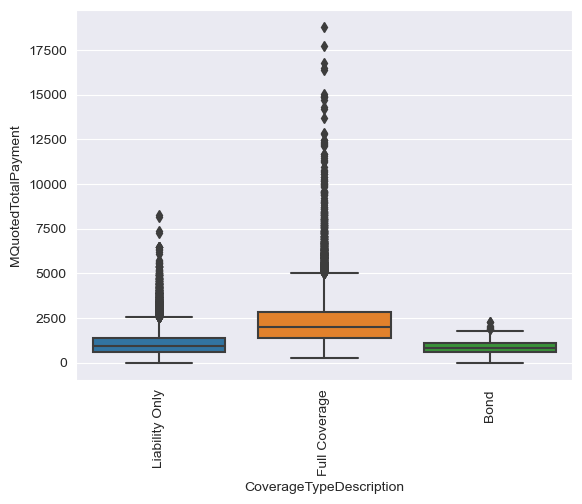

In [125]:
ax = sns.boxplot(x='CoverageTypeDescription',y='MQuotedTotalPayment', data=df_MasterQuote)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

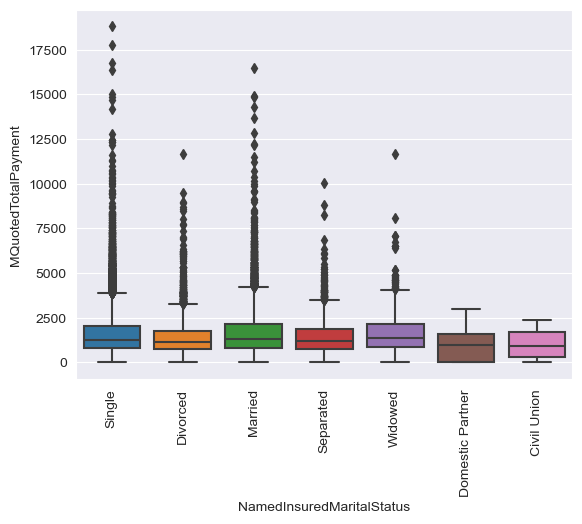

In [126]:
ax = sns.boxplot(x='NamedInsuredMaritalStatus',y='MQuotedTotalPayment', data=df_MasterQuote)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

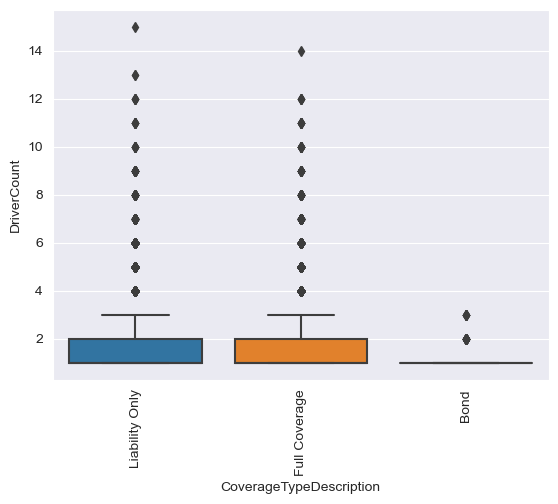

In [127]:
ax = sns.boxplot(x='CoverageTypeDescription',y='DriverCount', data=df_MasterQuote)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

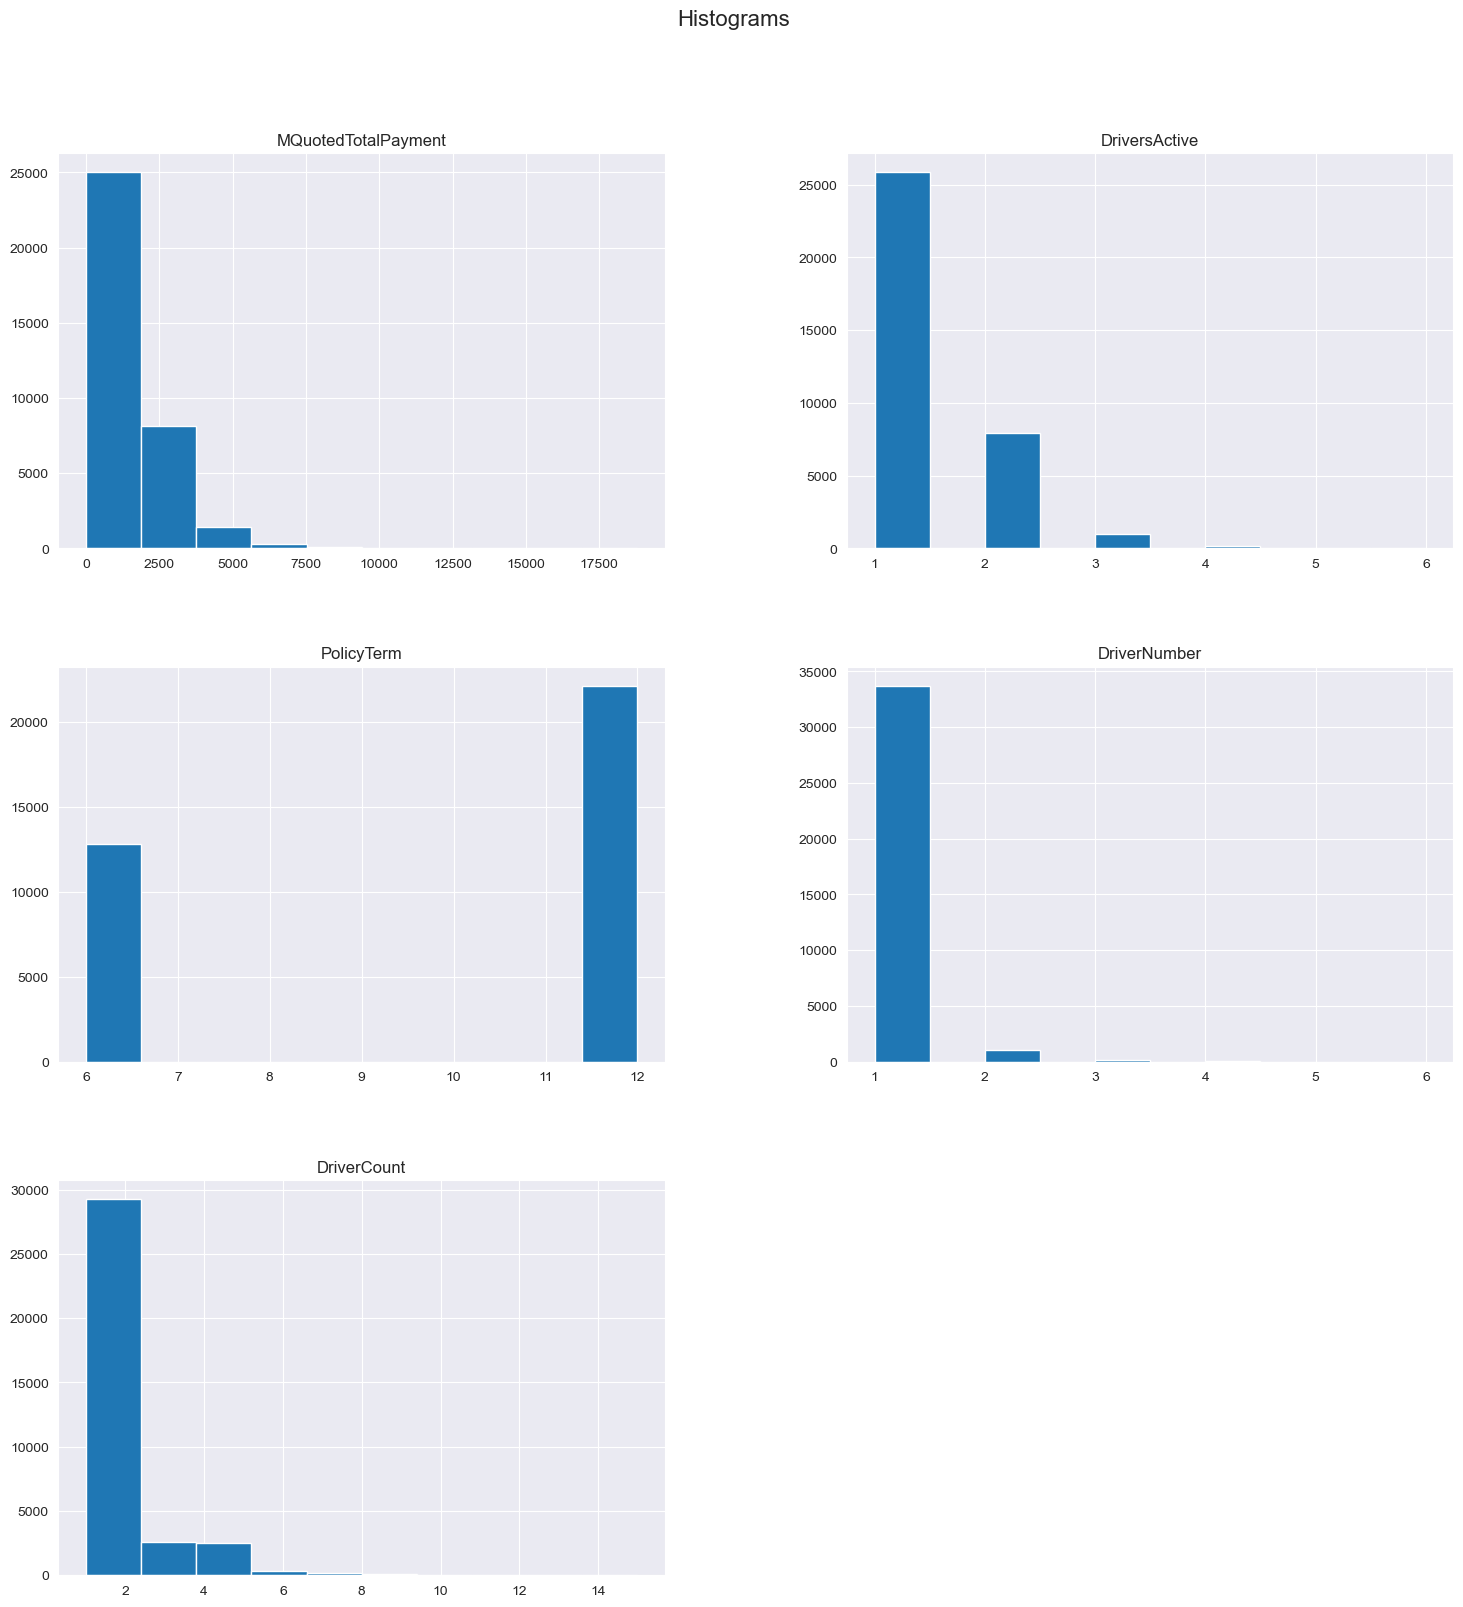

In [128]:
# Histograms
df_MasterQuote.hist(figsize=(18, 18))

# Customize titles to make them smaller
plt.suptitle('Histograms', fontsize=16)  # Overall title
plt.subplots_adjust(top=0.9)  # Adjust the top margin to make space for the subtitle

plt.show()

In [129]:
# Get dummies for 'CoverageTypeDescription' and 'NamedInsuredMaritalStatus'
df_MasterQuote = pd.get_dummies(df_MasterQuote, columns=['CoverageTypeDescription', 'NamedInsuredMaritalStatus'], drop_first=True,dummy_na=True)

# Drop unnecessary columns
columns_to_drop = ['AbilitecHouseholdID', 'GaragingState','PolicyStateCode','BiFcCoverageInd', 'QuoteNumber', 'PolicyNumber', 'QuoteInitiatedTime', 'TermEffectiveDate', 'TermExpirationDate','CoverageTypeDescription_nan','NamedInsuredMaritalStatus_nan','DriverNumber','AbilitecContactID']
df_MasterQuote.drop(columns=columns_to_drop, inplace=True)

In [130]:
# Identify boolean columns
bool_columns = df_MasterQuote.select_dtypes(include=bool).columns

# Convert boolean columns to 0/1
df_MasterQuote[bool_columns] = df_MasterQuote[bool_columns].astype(int)


In [131]:
df_MasterQuote.head()

,MQuotedTotalPayment,DriversActive,PolicyTerm,DriverCount,CoverageTypeDescription_Full Coverage,CoverageTypeDescription_Liability Only,NamedInsuredMaritalStatus_Divorced,NamedInsuredMaritalStatus_Domestic Partner,NamedInsuredMaritalStatus_Married,NamedInsuredMaritalStatus_Separated,NamedInsuredMaritalStatus_Single,NamedInsuredMaritalStatus_Widowed
0,1136.0,1,12,1,0,1,0,0,0,0,1,0
1,0.0,1,12,1,0,1,1,0,0,0,0,0
2,1160.0,2,12,2,0,1,0,0,1,0,0,0
3,3054.0,2,12,1,1,0,0,0,1,0,0,0
4,0.0,1,12,1,0,1,0,0,0,0,1,0


Top predictors for MQuotedTotalPayment
CoverageTypeDescription_Full Coverage         0.503844
PolicyTerm                                    0.267533
DriversActive                                 0.207669
DriverCount                                   0.152489
NamedInsuredMaritalStatus_Married             0.041412
NamedInsuredMaritalStatus_Widowed             0.013606
NamedInsuredMaritalStatus_Single              0.002514
NamedInsuredMaritalStatus_Domestic Partner   -0.006150
NamedInsuredMaritalStatus_Separated          -0.028794
NamedInsuredMaritalStatus_Divorced           -0.047496
CoverageTypeDescription_Liability Only       -0.494432
Name: MQuotedTotalPayment, dtype: float64


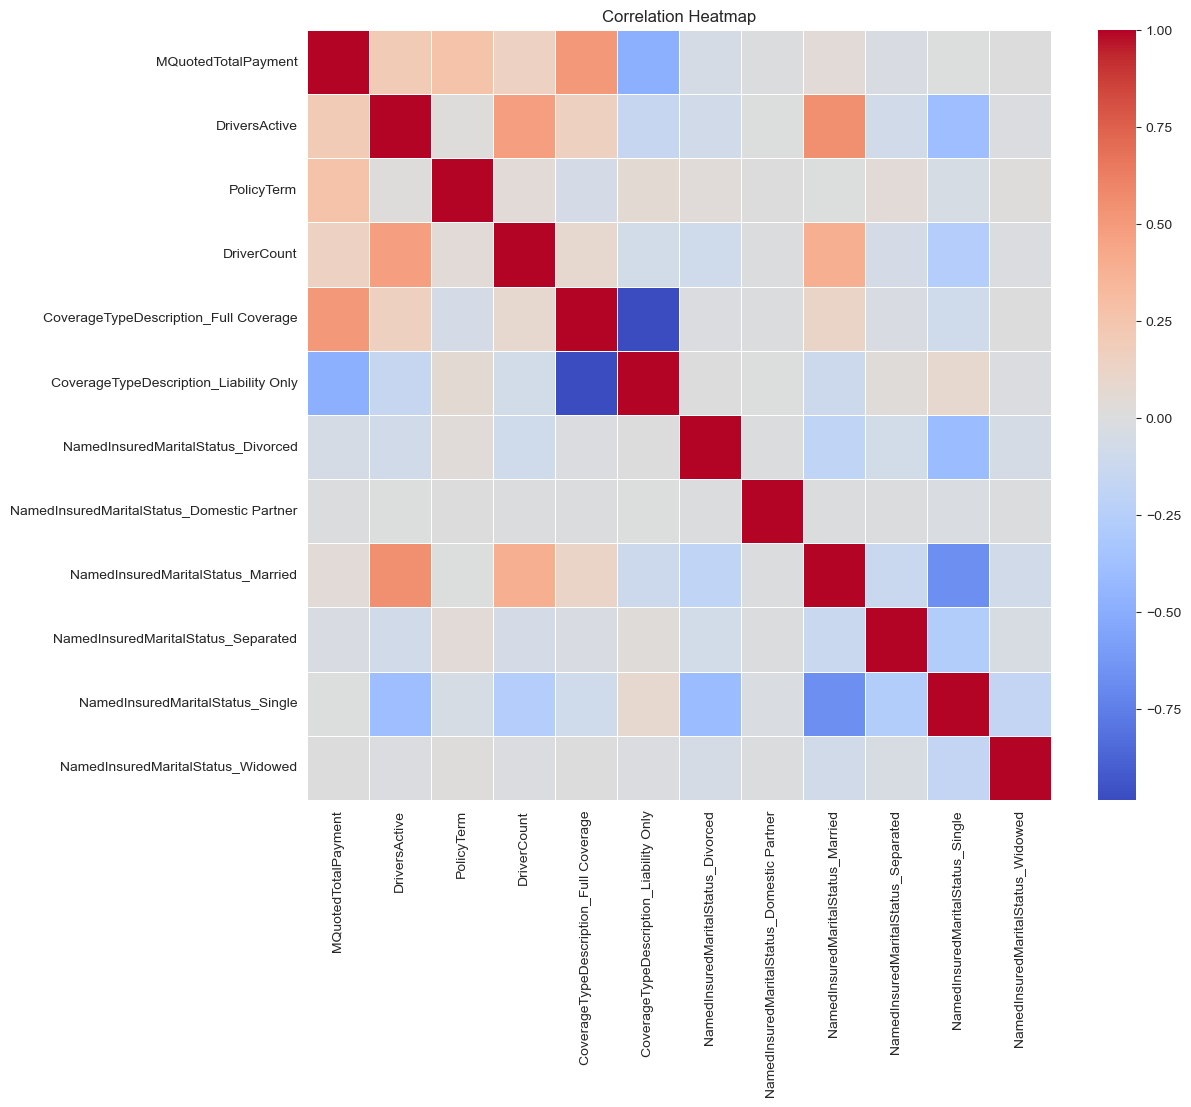

In [132]:
plt.show()
numeric_columns = df_MasterQuote.select_dtypes(include=['number'])
corr_matrix = numeric_columns.corr()

# Select the target column for correlation analysis
target_column = 'MQuotedTotalPayment'

# Get the top 20 correlated features with the target column
top_corr_features = corr_matrix[target_column].sort_values(ascending=False).head(21)[
                    1:]  # Exclude the target column itself

# Display the top 20 correlated features
print("Top predictors for", target_column)
print(top_corr_features)

# Visualize the correlation matrix (optional)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [224]:
label_encoder = LabelEncoder()
df_MasterQuote_LE['CoverageTypeEncoded'] = label_encoder.fit_transform(df_MasterQuote_LE['CoverageTypeDescription'])
df_MasterQuote_LE['NamedInsuredMaritalStatusEncoded'] = label_encoder.fit_transform(df_MasterQuote_LE['NamedInsuredMaritalStatus'])
df_MasterQuote_LE['BiFcCoverageIndEncoded'] = label_encoder.fit_transform(df_MasterQuote_LE['BiFcCoverageInd'])

In [225]:
# Drop unnecessary columns
columns_to_drop = ['AbilitecHouseholdID', 'GaragingState','PolicyStateCode','BiFcCoverageInd', 'QuoteNumber', 'PolicyNumber', 'QuoteInitiatedTime', 'TermEffectiveDate', 'TermExpirationDate','DriverNumber','AbilitecContactID','CoverageTypeDescription','NamedInsuredMaritalStatus', 'ACX_ZIP4']
df_MasterQuote_LE.drop(columns=columns_to_drop, inplace=True)

In [243]:
df_MasterQuote_LE = df_MasterQuote_LE[df_MasterQuote_LE['MQuotedTotalPayment'] != 0]

In [244]:
df_MasterQuote_LE.head()

,MQuotedTotalPayment,DriversActive,PolicyTerm,DriverCount,ACX_ZIPCODE,AP004913_Average_Monthly_Expenditure_For_Credit_Cards_Was_Greater_Than_2001_Fin_rank_base_20_AP004913,AP004916_Have_An_Average_Monthly_Debit_Card_Expenditure_Of_181_To_225_Fin_rank_base_20_AP004916,AP004921_Never_Or_Rarely_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004921,AP004922_Sometimes_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004922,AP004923_Usually_Or_Always_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004923,AP004924_Have_Accepted_Pre_Approved_Credit_Card_Offer_In_Past_12_Months_Fin_rank_base_20_AP004924,AP004925_Have_Used_Credit_Cards_For_Business_Purposes_Fin_rank_base_20_AP004925,AP004926_Have_Used_Credit_Cards_For_Personal_Purposes_Fin_rank_base_20_AP004926,AP004927_Use_A_Debit_Card_For_Personal_Use_Less_Than_Once_Per_Month_Fin_rank_base_20_AP004927,AP004928_Have_Used_Credit_Cards_For_Personal_Purchases_More_Than_20_Times_Per_Month_Fin_rank_base_20_AP004928,AP004929_Have_Used_Credit_Cards_For_Personal_Purchases_Between_11_20_Times_Per_Month_Fin_rank_base_20_AP004929,AP004930_Have_Used_Credit_Cards_For_Personal_Purchases_Between_6_10_Times_Per_Month_Fin_rank_base_20_AP004930,AP004931_Have_Used_Credit_Cards_For_Personal_Purchases_Between_1_5_Times_Per_Month_Fin_rank_base_20_AP004931,AP004932_Have_Used_Credit_Cards_For_Personal_Purchases_Less_Than_One_Time_Per_Month_Fin_rank_base_20_AP004932,AP004933_Use_A_Debit_Card_For_Personal_Use_More_Than_20_Times_Per_Month_Fin_rank_base_20_AP004933,AP004934_Use_A_Debit_Card_For_Personal_Use_Between_11_20_Times_Per_Month_Fin_rank_base_20_AP004934,AP004935_Use_A_Debit_Card_For_Personal_Use_Between_6_10_Times_Per_Month_Fin_rank_base_20_AP004935,AP004936_Use_A_Debit_Card_For_Personal_Use_Between_1_5_Times_Per_Month_Fin_rank_base_20_AP004936,AP004937_Have_Personal_Or_Joint_Home_Mortgage_1St_Fin_rank_base_20_AP004937,AP004938_Have_Acquired_Personal_Joint_Home_Mortgage_1St_In_Past_12_Months_Fin_rank_base_20_AP004938,AP004939_Have_Personal_Or_Joint_2Nd_Mortgage_Home_Equity_Loan_Fin_rank_base_20_AP004939,AP004940_Have_Personal_Or_Joint_Mortgage_Refinance_Consolidation_Loan_Fin_rank_base_20_AP004940,AP004941_Have_Personal_Or_Joint_Auto_Loan_Fin_rank_base_20_AP004941,AP004942_Have_Acquired_Personal_Joint_Auto_Loan_In_Past_12_Months_Fin_rank_base_20_AP004942,AP004943_Have_Personal_Or_Joint_Education_Student_Loan_Fin_rank_base_20_AP004943,AP004944_Have_Personal_Or_Joint_Loan_Not_For_Education_Purposes_Fin_rank_base_20_AP004944,AP004945_Have_Personal_Or_Joint_Personal_Line_Of_Credit_Fin_rank_base_20_AP004945,AP004946_Have_Personal_Or_Joint_Home_Equity_Line_Of_Credit_Fin_rank_base_20_AP004946,AP004947_Household_Owns_A_Vacation_Weekend_Home_Fin_rank_base_20_AP004947,AP004948_Household_Owns_Real_Estate_For_Investment_Purposes_Fin_rank_base_20_AP004948,AP004949_Household_Owns_Any_Type_Of_Real_Estate_Fin_rank_base_20_AP004949,AP004950_Household_Own_One_Vacation_Weekend_Home_Fin_rank_base_20_AP004950,AP004951_Household_Owns_One_Property_For_Real_Estate_Investment_Fin_rank_base_20_AP004951,AP004952_Household_Used_A_Real_Estate_Agent_To_Sell_A_Property_Fin_rank_base_20_AP004952,AP004953_Household_Used_A_Real_Estate_Agent_To_Buy_A_Property_Fin_rank_base_20_AP004953,AP004954_Household_Used_A_Real_Estate_Agent_Fin_rank_base_20_AP004954,AP004955_Household_Used_Other_Type_Of_Real_Estate_Agent_Fin_rank_base_20_AP004955,AP004958_Personal_Or_Joint_Savings_Account_Fin_rank_base_20_AP004958,AP004959_Acquired_A_Saving_Account_In_Past_12_Months_Fin_rank_base_20_AP004959,AP004960_Personal_Or_Joint_Cd_Certificate_Of_Deposit_Account_Fin_rank_base_20_AP004960,AP004961_Personal_Or_Joint_Interest_Checking_Account_Fin_rank_base_20_AP004961,AP004962_Acquired_An_Interest_Checking_Account_In_Past_12_Months_Fin_rank_base_20_AP004962,AP004963_Personal_Or_Joint_Non_Interest_Checking_Account_Fin_rank_base_20_AP004963,AP004964_Acquired_A_Non_Interest_Checking_Account_In_Past_12_Months_Fin_rank_base_20_AP004964,AP004965_Personal_Or_J

In [245]:
df_MasterQuote_LinearRegression = df_MasterQuote_LE.copy()

In [246]:
# Assuming df is your DataFrame and 'QuotedTotalPayment' is the column of interest
z_scores = zscore(df_MasterQuote_LinearRegression['MQuotedTotalPayment'])

# Define a Z-score threshold (e.g., 3)
threshold = 3

# Create a new DataFrame without outliers
df_no_outliers = df_MasterQuote_LinearRegression[(z_scores < threshold) & (z_scores > -threshold)]

In [247]:
df_no_outliers.head()

,MQuotedTotalPayment,DriversActive,PolicyTerm,DriverCount,ACX_ZIPCODE,AP004913_Average_Monthly_Expenditure_For_Credit_Cards_Was_Greater_Than_2001_Fin_rank_base_20_AP004913,AP004916_Have_An_Average_Monthly_Debit_Card_Expenditure_Of_181_To_225_Fin_rank_base_20_AP004916,AP004921_Never_Or_Rarely_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004921,AP004922_Sometimes_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004922,AP004923_Usually_Or_Always_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004923,AP004924_Have_Accepted_Pre_Approved_Credit_Card_Offer_In_Past_12_Months_Fin_rank_base_20_AP004924,AP004925_Have_Used_Credit_Cards_For_Business_Purposes_Fin_rank_base_20_AP004925,AP004926_Have_Used_Credit_Cards_For_Personal_Purposes_Fin_rank_base_20_AP004926,AP004927_Use_A_Debit_Card_For_Personal_Use_Less_Than_Once_Per_Month_Fin_rank_base_20_AP004927,AP004928_Have_Used_Credit_Cards_For_Personal_Purchases_More_Than_20_Times_Per_Month_Fin_rank_base_20_AP004928,AP004929_Have_Used_Credit_Cards_For_Personal_Purchases_Between_11_20_Times_Per_Month_Fin_rank_base_20_AP004929,AP004930_Have_Used_Credit_Cards_For_Personal_Purchases_Between_6_10_Times_Per_Month_Fin_rank_base_20_AP004930,AP004931_Have_Used_Credit_Cards_For_Personal_Purchases_Between_1_5_Times_Per_Month_Fin_rank_base_20_AP004931,AP004932_Have_Used_Credit_Cards_For_Personal_Purchases_Less_Than_One_Time_Per_Month_Fin_rank_base_20_AP004932,AP004933_Use_A_Debit_Card_For_Personal_Use_More_Than_20_Times_Per_Month_Fin_rank_base_20_AP004933,AP004934_Use_A_Debit_Card_For_Personal_Use_Between_11_20_Times_Per_Month_Fin_rank_base_20_AP004934,AP004935_Use_A_Debit_Card_For_Personal_Use_Between_6_10_Times_Per_Month_Fin_rank_base_20_AP004935,AP004936_Use_A_Debit_Card_For_Personal_Use_Between_1_5_Times_Per_Month_Fin_rank_base_20_AP004936,AP004937_Have_Personal_Or_Joint_Home_Mortgage_1St_Fin_rank_base_20_AP004937,AP004938_Have_Acquired_Personal_Joint_Home_Mortgage_1St_In_Past_12_Months_Fin_rank_base_20_AP004938,AP004939_Have_Personal_Or_Joint_2Nd_Mortgage_Home_Equity_Loan_Fin_rank_base_20_AP004939,AP004940_Have_Personal_Or_Joint_Mortgage_Refinance_Consolidation_Loan_Fin_rank_base_20_AP004940,AP004941_Have_Personal_Or_Joint_Auto_Loan_Fin_rank_base_20_AP004941,AP004942_Have_Acquired_Personal_Joint_Auto_Loan_In_Past_12_Months_Fin_rank_base_20_AP004942,AP004943_Have_Personal_Or_Joint_Education_Student_Loan_Fin_rank_base_20_AP004943,AP004944_Have_Personal_Or_Joint_Loan_Not_For_Education_Purposes_Fin_rank_base_20_AP004944,AP004945_Have_Personal_Or_Joint_Personal_Line_Of_Credit_Fin_rank_base_20_AP004945,AP004946_Have_Personal_Or_Joint_Home_Equity_Line_Of_Credit_Fin_rank_base_20_AP004946,AP004947_Household_Owns_A_Vacation_Weekend_Home_Fin_rank_base_20_AP004947,AP004948_Household_Owns_Real_Estate_For_Investment_Purposes_Fin_rank_base_20_AP004948,AP004949_Household_Owns_Any_Type_Of_Real_Estate_Fin_rank_base_20_AP004949,AP004950_Household_Own_One_Vacation_Weekend_Home_Fin_rank_base_20_AP004950,AP004951_Household_Owns_One_Property_For_Real_Estate_Investment_Fin_rank_base_20_AP004951,AP004952_Household_Used_A_Real_Estate_Agent_To_Sell_A_Property_Fin_rank_base_20_AP004952,AP004953_Household_Used_A_Real_Estate_Agent_To_Buy_A_Property_Fin_rank_base_20_AP004953,AP004954_Household_Used_A_Real_Estate_Agent_Fin_rank_base_20_AP004954,AP004955_Household_Used_Other_Type_Of_Real_Estate_Agent_Fin_rank_base_20_AP004955,AP004958_Personal_Or_Joint_Savings_Account_Fin_rank_base_20_AP004958,AP004959_Acquired_A_Saving_Account_In_Past_12_Months_Fin_rank_base_20_AP004959,AP004960_Personal_Or_Joint_Cd_Certificate_Of_Deposit_Account_Fin_rank_base_20_AP004960,AP004961_Personal_Or_Joint_Interest_Checking_Account_Fin_rank_base_20_AP004961,AP004962_Acquired_An_Interest_Checking_Account_In_Past_12_Months_Fin_rank_base_20_AP004962,AP004963_Personal_Or_Joint_Non_Interest_Checking_Account_Fin_rank_base_20_AP004963,AP004964_Acquired_A_Non_Interest_Checking_Account_In_Past_12_Months_Fin_rank_base_20_AP004964,AP004965_Personal_Or_J

In [248]:
df_no_outliers = df_no_outliers.fillna(0)

In [249]:
# Check for NaN values in each column
nan_columns = df_no_outliers.columns[df_no_outliers.isnull().any()]

# Display columns with NaN values
print("Columns with NaN values:")
print(nan_columns)

Columns with NaN values:
Index([], dtype='object')


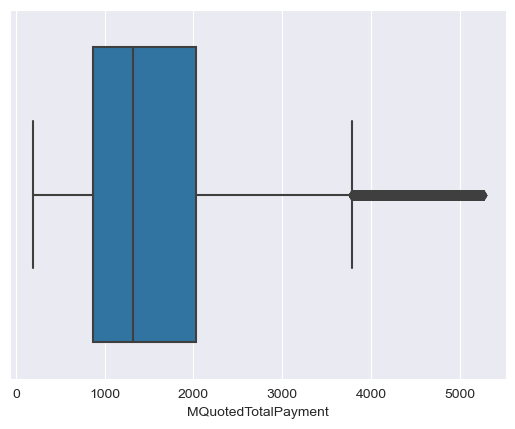

In [250]:
sns.boxplot(x=df_no_outliers['MQuotedTotalPayment'])
plt.show()

## Linear Regression

In [251]:
# Step 1: Set up linear regression on the original data

# Extract features (X) and target variable (y)
X_original = df_no_outliers.drop(columns=['MQuotedTotalPayment'])
y_original = df_no_outliers['MQuotedTotalPayment']

# Split the data into training and testing sets
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

# Create and fit the linear regression model on the original data
model_original = LinearRegression()
model_original.fit(X_train_original, y_train_original)

LinearRegression()

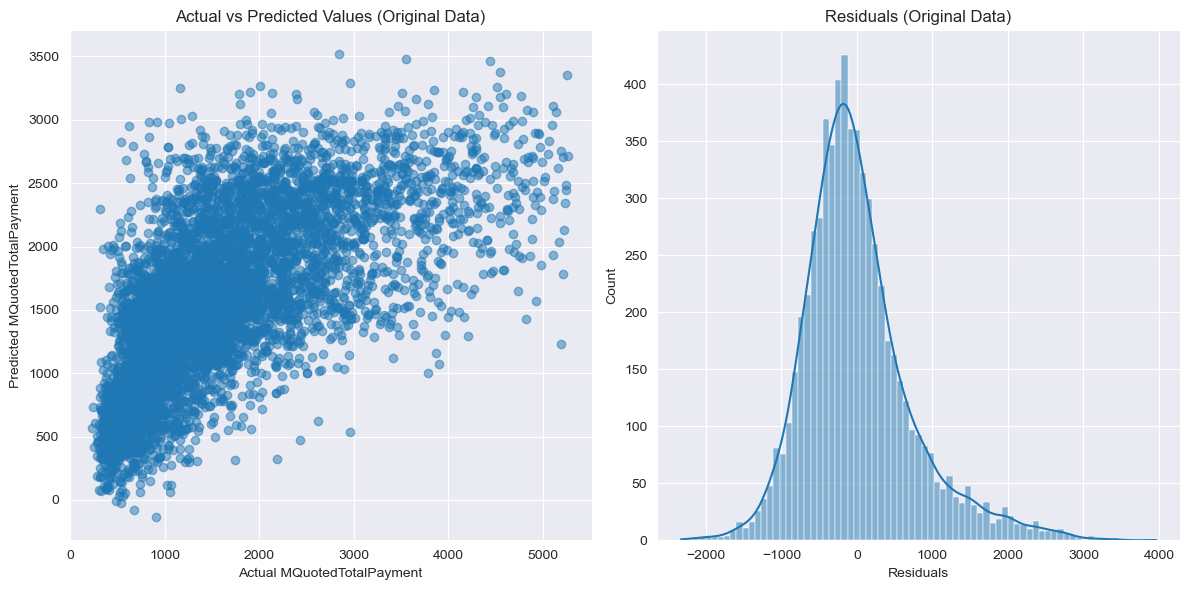

In [252]:
# Step 2: Visualize the results for the original data
# For simplicity, you can visualize the predicted values vs. actual values on the test set
y_pred_original = model_original.predict(X_test_original)

plt.figure(figsize=(12, 6))

# Scatter plot for actual vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.title('Actual vs Predicted Values (Original Data)')
plt.xlabel('Actual MQuotedTotalPayment')
plt.ylabel('Predicted MQuotedTotalPayment')

# Residual plot
plt.subplot(1, 2, 2)
residuals_original = y_test_original - y_pred_original
sns.histplot(residuals_original, kde=True)
plt.title('Residuals (Original Data)')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

In [253]:
# Step 3: Scale the data and run linear regression again

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# Split the scaled data into training and testing sets
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_original, test_size=0.2, random_state=42)

# Create and fit the linear regression model on the scaled data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [255]:
# Extract features (X) and target variable (y)
X = df_no_outliers.drop(columns=['MQuotedTotalPayment'])
y = df_no_outliers['MQuotedTotalPayment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the linear regression model on the original data
model_original = LinearRegression()
model_original.fit(X_train_scaled, y_train)

# Use feature selection to get important features
sfm = SelectFromModel(model_original, prefit=True)

# Transform the data to include only important features
X_train_selected = sfm.transform(X_train_scaled)
X_test_selected = sfm.transform(X_test_scaled)

# Create a new DataFrame with selected features
selected_features = X.columns[sfm.get_support()]
df_selected_features = df_MasterQuote[selected_features]

# Calculate the correlation matrix for the selected features
correlation_matrix = df_selected_features.corr().abs()

# Remove highly correlated features
upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
to_drop = [column for column in correlation_matrix.columns if any(correlation_matrix[column] > 0.95)]
df_masterquote_no_correlation = df_selected_features.drop(columns=to_drop)

# Display the selected features and the DataFrame without highly correlated features
print("Selected Features:")
print(selected_features)
print("\nDataFrame without Highly Correlated Features:")
print(df_masterquote_no_correlation)

TypeError: 'DataFrame' object is not callable

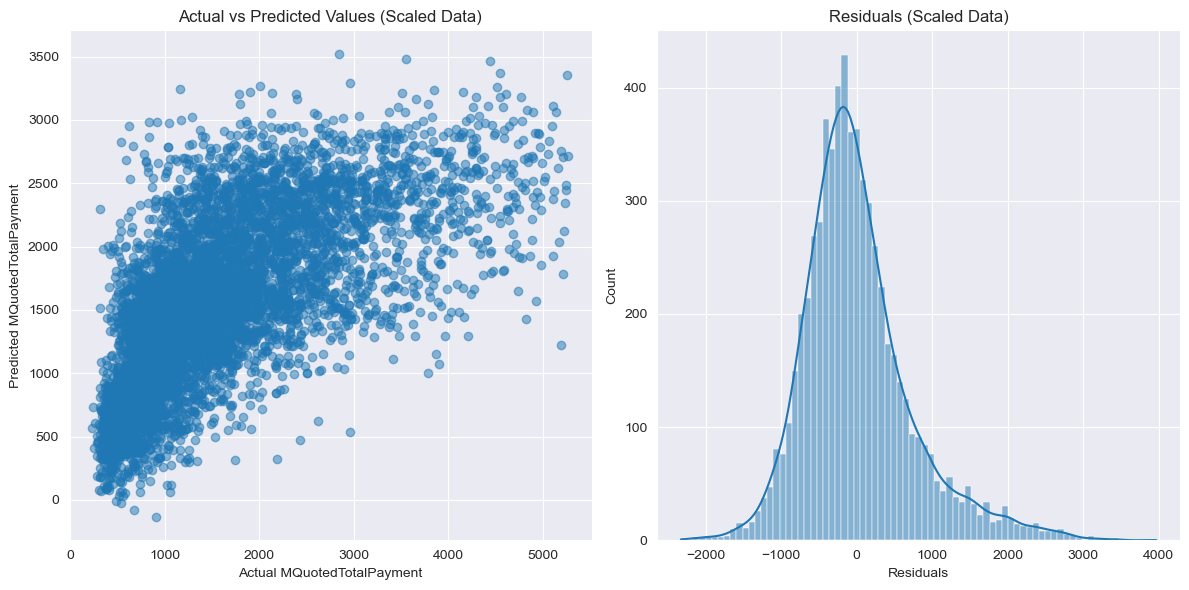

In [256]:
# Step 4: Visualize the results for the scaled data
# For simplicity, you can visualize the predicted values vs. actual values on the test set
y_pred_scaled = model_scaled.predict(X_test_scaled)

plt.figure(figsize=(12, 6))

# Scatter plot for actual vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test_scaled, y_pred_scaled, alpha=0.5)
plt.title('Actual vs Predicted Values (Scaled Data)')
plt.xlabel('Actual MQuotedTotalPayment')
plt.ylabel('Predicted MQuotedTotalPayment')

# Residual plot
plt.subplot(1, 2, 2)
residuals_scaled = y_test_scaled - y_pred_scaled
sns.histplot(residuals_scaled, kde=True)
plt.title('Residuals (Scaled Data)')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

In [257]:
# Calculate metrics for the original data
r2_original = r2_score(y_test_original, y_pred_original)
mse_original = mean_squared_error(y_test_original, y_pred_original)
rmse_original = np.sqrt(mse_original)
mae_original = mean_absolute_error(y_test_original, y_pred_original)
rmspe_original = np.sqrt(np.mean(((y_test_original - y_pred_original) / y_test_original)**2)) * 100

# Calculate metrics for the scaled data
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)
mae_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
rmspe_scaled = np.sqrt(np.mean(((y_test_scaled - y_pred_scaled) / y_test_scaled)**2)) * 100

# Create a DataFrame to store the metrics for both models
metrics_df = pd.DataFrame({
    'Metric': ['R2', 'MSE', 'RMSE', 'MAE', 'RMSPE'],
    'Original Model': [r2_original, mse_original, rmse_original, mae_original, rmspe_original],
    'Scaled Model': [r2_scaled, mse_scaled, rmse_scaled, mae_scaled, rmspe_scaled]
})

metrics_df.head()

,Metric,Original Model,Scaled Model
0,R2,0.437221,0.437162
1,MSE,522462.011322,522517.473141
2,RMSE,722.815337,722.853701
3,MAE,531.380218,531.250598
4,RMSPE,56.757597,56.692608


In [258]:
# Extract features (X) and target variable (y)
X_original = df_no_outliers.drop(columns=['MQuotedTotalPayment'])
y_original = df_no_outliers['MQuotedTotalPayment']

# Split the data into training and testing sets
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

# Create and fit the linear regression model on the original data
model_original = LinearRegression()
model_original.fit(X_train_original, y_train_original)

# Predictions on the test set
y_pred_original = model_original.predict(X_test_original)

# Calculate metrics for the original model
r2_original = r2_score(y_test_original, y_pred_original)
mse_original = mean_squared_error(y_test_original, y_pred_original)
rmse_original = np.sqrt(mse_original)
mae_original = mean_absolute_error(y_test_original, y_pred_original)
rmspe_original = np.sqrt(np.mean(((y_test_original - y_pred_original) / y_test_original) ** 2)) * 100

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# Split the scaled data into training and testing sets
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_original, test_size=0.2, random_state=42)

# Create and fit the linear regression model on the scaled data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train_scaled)

# Predictions on the scaled test set
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Calculate metrics for the scaled model
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)
mae_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
rmspe_scaled = np.sqrt(np.mean(((y_test_scaled - y_pred_scaled) / y_test_scaled) ** 2)) * 100

# Create a DataFrame to store the metrics for both models
metrics_df = pd.DataFrame({
    'Metric': ['R2', 'MSE', 'RMSE', 'MAE', 'RMSPE'],
    'Original Model': [r2_original, mse_original, rmse_original, mae_original, rmspe_original],
    'Scaled Model': [r2_scaled, mse_scaled, rmse_scaled, mae_scaled, rmspe_scaled]
})

In [259]:
metrics_df.head()

,Metric,Original Model,Scaled Model
0,R2,0.437221,0.437222
1,MSE,522462.011322,522461.210229
2,RMSE,722.815337,722.814783
3,MAE,531.380218,531.380053
4,RMSPE,56.757597,56.757564


In [260]:
# Predictions on the test set for the original model
y_pred_original = model_original.predict(X_test_original)

# Predictions on the test set for the model without outliers
y_pred_no_outliers = model_scaled.predict(X_test_scaled)

# Metrics for the original model
mse_original = mean_squared_error(y_test_original, y_pred_original)
r2_original = r2_score(y_test_original, y_pred_original)

# Metrics for the model without outliers
mse_no_outliers = mean_squared_error(y_test_scaled, y_pred_no_outliers)
r2_no_outliers = r2_score(y_test_scaled, y_pred_no_outliers)

# Print metrics for both models
print("Metrics for the Original Model:")
print(f"Mean Squared Error: {mse_original}")
print(f"R-squared: {r2_original}")
print("\n")

print("Metrics for the Model without Outliers:")
print(f"Mean Squared Error: {mse_no_outliers}")
print(f"R-squared: {r2_no_outliers}")

Metrics for the Original Model:
Mean Squared Error: 522462.01132177317
R-squared: 0.43722137955036


Metrics for the Model without Outliers:
Mean Squared Error: 522461.2102286603
R-squared: 0.43722224246109254


# Logistic Regression

## Loading the TheGeneral dataset

In [21]:
df_TheGeneral = pd.read_csv('Dataset/TheGeneral.csv', header = 0)

In [22]:
df_TheGeneral.head()

,AbilitecContactID,PolicyNumber,DriverNumber,AbilitecHouseholdID,DriverCount,ClaimCount,TotalPaid,ClaimNumber,AtFaultDescription,ClaimStatus,...,DriverID,LossState,PolicyStateCode,SubrogrationFlag,TermEffectiveDate,VehicleID,ClaimTransCount,ClaimTransPaidLoss,DaysToClaim,DaysToClaim_h
0,04ZJUS02EXPR09CB,Q080MDE1MTY2,1,04ZJUS0300X496LW,4,1,5086.61,PA0002364104,No fault,C,...,98,CO,CO,NO,2018-05-29 00:00:00,1,9.0,5086.61,0.0,0.0
1,04ZJUS0146KL4TTS,Q080MDEwOTEx,1,04ZJUS035SBF0GJ4,2,1,0.00,PA0002351705,Insured at fault,C,...,1,CO,CO,NO,2018-05-24 00:00:00,1,4.0,0.00,0.0,0.0
2,04ZJUS02K2KC7DMW,Q080MDExOTIz,1,04ZJUS035ZXBZEH1,2,1,21397.74,PA0002344011,Insured at fault,C,...,1,CO,CO,NO,2018-05-25 00:00:00,1,53.0,21397.74,0.0,0.0
3,04ZJUS022XH2NVJ5,Q080MDIyMDcw,1,04ZJUS038P3W5KKR,5,3,0.00,PA0002348918,No fault,C,...,98,CO,CO,YES,2018-06-01 00:00:00,2,14.0,0.00,0.0,0.0
4,04ZJUS022XH2NVJ5,Q080MDIyMDcw,1,04ZJUS038P3W5KKR,5,3,0.00,PA0002348997,No fault,C,...,1,CO,CO,NO,2018-06-01 00:00:00,2,1.0,0.00,0.0,0.0


In [23]:
df_TheGeneral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11069 entries, 0 to 11068
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AbilitecContactID    11069 non-null  object 
 1   PolicyNumber         11069 non-null  object 
 2   DriverNumber         11069 non-null  int64  
 3   AbilitecHouseholdID  11069 non-null  object 
 4   DriverCount          11069 non-null  int64  
 5   ClaimCount           11069 non-null  int64  
 6   TotalPaid            11069 non-null  float64
 7   ClaimNumber          11069 non-null  object 
 8   AtFaultDescription   11069 non-null  object 
 9   ClaimStatus          11069 non-null  object 
 10  ClaimType            11069 non-null  object 
 11  DateOfLoss           11069 non-null  object 
 12  DriverID             11069 non-null  int64  
 13  LossState            11069 non-null  object 
 14  PolicyStateCode      10948 non-null  object 
 15  SubrogrationFlag     11069 non-null 

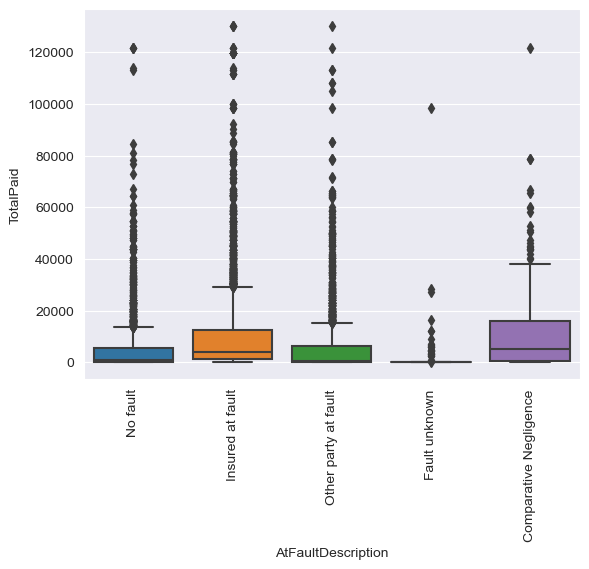

In [24]:
ax = sns.boxplot(x='AtFaultDescription',y='TotalPaid', data=df_TheGeneral)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [26]:
# Get dummies for 'CoverageTypeDescription' and 'NamedInsuredMaritalStatus'
df_TheGeneral = pd.get_dummies(df_TheGeneral, columns=['AtFaultDescription', 'SubrogrationFlag'], drop_first=True,dummy_na=True)

# Drop unnecessary columns
columns_to_drop = []
df_TheGeneral.drop(columns=columns_to_drop, inplace=True)

In [27]:
# Identify boolean columns
bool_columns = df_TheGeneral.select_dtypes(include=bool).columns

# Convert boolean columns to 0/1
df_TheGeneral[bool_columns] = df_TheGeneral[bool_columns].astype(int)


In [ ]:
df_TheGeneral.head()

Top predictors for TotalPaid
ClaimTransPaidLoss                         0.628088
ClaimCount                                 0.477972
ClaimTransCount                            0.404463
AtFaultDescription_Insured at fault        0.165471
DriverCount                                0.102298
SubrogrationFlag_YES                       0.049073
VehicleID                                  0.002698
DriverID                                  -0.000869
DriverNumber                              -0.019702
DaysToClaim_h                             -0.037990
DaysToClaim                               -0.037990
AtFaultDescription_Fault unknown          -0.041327
AtFaultDescription_Other party at fault   -0.095254
AtFaultDescription_No fault               -0.098968
AtFaultDescription_nan                          NaN
SubrogrationFlag_nan                            NaN
Name: TotalPaid, dtype: float64


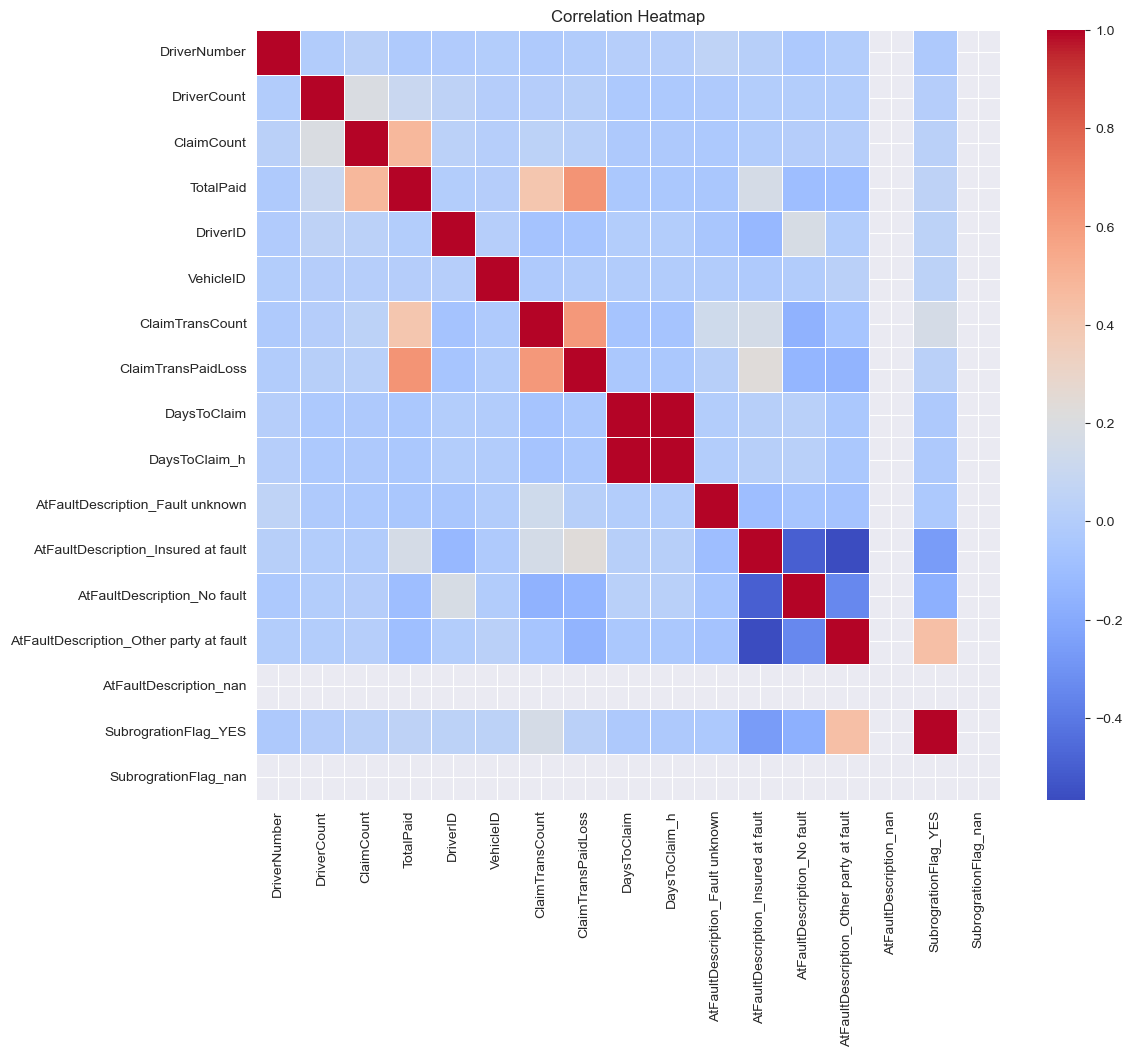

In [28]:
plt.show()
numeric_columns = df_TheGeneral.select_dtypes(include=['number'])
corr_matrix = numeric_columns.corr()

# Select the target column for correlation analysis
target_column = 'TotalPaid'

# Get the top 20 correlated features with the target column
top_corr_features = corr_matrix[target_column].sort_values(ascending=False).head(21)[
                    1:]  # Exclude the target column itself

# Display the top 20 correlated features
print("Top predictors for", target_column)
print(top_corr_features)

# Visualize the correlation matrix (optional)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

,AbilitecContactID,ACX_ZIPCODE,ACX_ZIP4,AP004913_Average_Monthly_Expenditure_For_Credit_Cards_Was_Greater_Than_2001_Fin_rank_base_20_AP004913,AP004916_Have_An_Average_Monthly_Debit_Card_Expenditure_Of_181_To_225_Fin_rank_base_20_AP004916,AP004921_Never_Or_Rarely_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004921,AP004922_Sometimes_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004922,AP004923_Usually_Or_Always_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004923,AP004924_Have_Accepted_Pre_Approved_Credit_Card_Offer_In_Past_12_Months_Fin_rank_base_20_AP004924,AP004925_Have_Used_Credit_Cards_For_Business_Purposes_Fin_rank_base_20_AP004925,...,AP005355_Use_MoneyGram_Money_Transfer_Services_Fin_rank_base_20_AP005355,AP005356_Use_Other_Online_Tax_Program_Service_Fin_rank_base_20_AP005356,AP005358_Use_Other_Type_of_Money_Transfer_Services_Fin_rank_base_20_AP005358,AP005363_Acquired_Homeowners_or_Personal_Prprty_Insurance_in_Response_to_Direct_Mail_Advertising_Fin_rank_base_20_AP005363,AP005364_Aetna_Life_Insurance_Fin_rank_base_20_AP005364,AP005365_Aflac_Life_Insurance_Fin_rank_base_20_AP005365,AP005366_AIG_American_General_Life_Insurance_Fin_rank_base_20_AP005366,AP005367_Allstate_Life_Insurance_Fin_rank_base_20_AP005367,AP005368_American_Family_Life_Insurance_Fin_rank_base_20_AP005368,AP005369_Bankers_Life_Causality_Life_Insurance_Fin_rank_base_20_AP005369
1,04ZJUS11ZZX6Z5PH,42040,9553.0,15.0,13.0,14.0,12.0,12.0,9.0,16.0,...,14.0,8.0,18.0,11.0,16.0,3.0,3.0,2.0,15.0,6.0
3,04ZJUS11ZZV842QB,35613,1512.0,6.0,4.0,11.0,12.0,10.0,13.0,6.0,...,5.0,18.0,2.0,10.0,8.0,17.0,4.0,8.0,2.0,10.0
6,04ZJUS11ZZT1XXYJ,53190,1001.0,13.0,8.0,16.0,14.0,11.0,10.0,12.0,...,12.0,1.0,5.0,17.0,15.0,12.0,16.0,19.0,6.0,6.0
9,04ZJUS11ZZPV93BL,80221,3798.0,11.0,15.0,19.0,19.0,18.0,18.0,18.0,...,7.0,6.0,14.0,6.0,11.0,4.0,10.0,6.0,8.0,11.0
10,04ZJUS11ZZPDGK4D,46808,1008.0,14.0,18.0,18.0,19.0,17.0,16.0,17.0,...,8.0,12.0,11.0,12.0,2.0,9.0,12.0,20.0,11.0,5.0


In [61]:
# Convert 'AbilitecContactID' to the same data type in both DataFrames
df_Abilitech['AbilitecContactID'] = df_Abilitech['AbilitecContactID'].astype(str)
df_TheGeneral['AbilitecContactID'] = df_TheGeneral['AbilitecContactID'].astype(str)

# Assuming 'df_Abilitech' and 'df_TheGeneral' have columns 'AbilitecContactID' and 'ACX_ZIPCODE'
merged_TG_df = pd.merge(df_TheGeneral, df_Abilitech, on='AbilitecContactID', how='left')

# Now, inspect the merged DataFrame
merged_TG_df.head()

,AbilitecContactID,PolicyNumber,DriverNumber,AbilitecHouseholdID,DriverCount,ClaimCount,TotalPaid,ClaimNumber,AtFaultDescription,ClaimStatus,ClaimType,DateOfLoss,DriverID,LossState,PolicyStateCode,SubrogrationFlag,TermEffectiveDate,VehicleID,ClaimTransCount,ClaimTransPaidLoss,DaysToClaim,DaysToClaim_h,ACX_ZIPCODE,ACX_ZIP4,AP004913_Average_Monthly_Expenditure_For_Credit_Cards_Was_Greater_Than_2001_Fin_rank_base_20_AP004913,AP004916_Have_An_Average_Monthly_Debit_Card_Expenditure_Of_181_To_225_Fin_rank_base_20_AP004916,AP004921_Never_Or_Rarely_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004921,AP004922_Sometimes_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004922,AP004923_Usually_Or_Always_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004923,AP004924_Have_Accepted_Pre_Approved_Credit_Card_Offer_In_Past_12_Months_Fin_rank_base_20_AP004924,AP004925_Have_Used_Credit_Cards_For_Business_Purposes_Fin_rank_base_20_AP004925,AP004926_Have_Used_Credit_Cards_For_Personal_Purposes_Fin_rank_base_20_AP004926,AP004927_Use_A_Debit_Card_For_Personal_Use_Less_Than_Once_Per_Month_Fin_rank_base_20_AP004927,AP004928_Have_Used_Credit_Cards_For_Personal_Purchases_More_Than_20_Times_Per_Month_Fin_rank_base_20_AP004928,AP004929_Have_Used_Credit_Cards_For_Personal_Purchases_Between_11_20_Times_Per_Month_Fin_rank_base_20_AP004929,AP004930_Have_Used_Credit_Cards_For_Personal_Purchases_Between_6_10_Times_Per_Month_Fin_rank_base_20_AP004930,AP004931_Have_Used_Credit_Cards_For_Personal_Purchases_Between_1_5_Times_Per_Month_Fin_rank_base_20_AP004931,AP004932_Have_Used_Credit_Cards_For_Personal_Purchases_Less_Than_One_Time_Per_Month_Fin_rank_base_20_AP004932,AP004933_Use_A_Debit_Card_For_Personal_Use_More_Than_20_Times_Per_Month_Fin_rank_base_20_AP004933,AP004934_Use_A_Debit_Card_For_Personal_Use_Between_11_20_Times_Per_Month_Fin_rank_base_20_AP004934,AP004935_Use_A_Debit_Card_For_Personal_Use_Between_6_10_Times_Per_Month_Fin_rank_base_20_AP004935,AP004936_Use_A_Debit_Card_For_Personal_Use_Between_1_5_Times_Per_Month_Fin_rank_base_20_AP004936,AP004937_Have_Personal_Or_Joint_Home_Mortgage_1St_Fin_rank_base_20_AP004937,AP004938_Have_Acquired_Personal_Joint_Home_Mortgage_1St_In_Past_12_Months_Fin_rank_base_20_AP004938,AP004939_Have_Personal_Or_Joint_2Nd_Mortgage_Home_Equity_Loan_Fin_rank_base_20_AP004939,AP004940_Have_Personal_Or_Joint_Mortgage_Refinance_Consolidation_Loan_Fin_rank_base_20_AP004940,AP004941_Have_Personal_Or_Joint_Auto_Loan_Fin_rank_base_20_AP004941,AP004942_Have_Acquired_Personal_Joint_Auto_Loan_In_Past_12_Months_Fin_rank_base_20_AP004942,AP004943_Have_Personal_Or_Joint_Education_Student_Loan_Fin_rank_base_20_AP004943,AP004944_Have_Personal_Or_Joint_Loan_Not_For_Education_Purposes_Fin_rank_base_20_AP004944,AP004945_Have_Personal_Or_Joint_Personal_Line_Of_Credit_Fin_rank_base_20_AP004945,AP004946_Have_Personal_Or_Joint_Home_Equity_Line_Of_Credit_Fin_rank_base_20_AP004946,AP004947_Household_Owns_A_Vacation_Weekend_Home_Fin_rank_base_20_AP004947,AP004948_Household_Owns_Real_Estate_For_Investment_Purposes_Fin_rank_base_20_AP004948,AP004949_Household_Owns_Any_Type_Of_Real_Estate_Fin_rank_base_20_AP004949,AP004950_Household_Own_One_Vacation_Weekend_Home_Fin_rank_base_20_AP004950,AP004951_Household_Owns_One_Property_For_Real_Estate_Investment_Fin_rank_base_20_AP004951,AP004952_Household_Used_A_Real_Estate_Agent_To_Sell_A_Property_Fin_rank_base_20_AP004952,AP004953_Household_Used_A_Real_Estate_Agent_To_Buy_A_Property_Fin_rank_base_20_AP004953,AP004954_Household_Used_A_Real_Estate_Agent_Fin_rank_base_20_AP004954,AP004955_Household_Used_Other_Type_Of_Real_Estate_Agent_Fin_rank_base_20_AP004955,AP004958_Personal_Or_Joint_Savings_Account_Fin_rank_base_20_AP004958,AP004959_Acquired_A_Saving_Account_In_Past_12_Months_Fin_rank_base_20_AP004959,AP004960_Personal_Or_Joint_Cd_Certificate_Of_Deposit_Account_Fin_rank_base_20_AP004960,AP004961_Personal_Or_Joint_Interest_Checking_Account_Fin_rank_base_20_AP004961,AP004962_Acquired_An_Interest_Checki

In [62]:
# Convert 'AbilitecContactID' to the same data type in MasterQuote

df_MasterQuote['AbilitecContactID'] = df_MasterQuote['AbilitecContactID'].astype(str)

merged_MQ_df = pd.merge(df_MasterQuote, df_Abilitech, on='AbilitecContactID', how='left')

# Now, inspect the merged DataFrame
merged_MQ_df.head()

,QuoteNumber,MQuotedTotalPayment,BiFcCoverageInd,CoverageTypeDescription,DriversActive,GaragingState,NamedInsuredMaritalStatus,PolicyNumber,PolicyStateCode,PolicyTerm,QuoteInitiatedTime,TermEffectiveDate,TermExpirationDate,AbilitecContactID,DriverNumber,AbilitecHouseholdID,DriverCount,ACX_ZIPCODE,ACX_ZIP4,AP004913_Average_Monthly_Expenditure_For_Credit_Cards_Was_Greater_Than_2001_Fin_rank_base_20_AP004913,AP004916_Have_An_Average_Monthly_Debit_Card_Expenditure_Of_181_To_225_Fin_rank_base_20_AP004916,AP004921_Never_Or_Rarely_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004921,AP004922_Sometimes_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004922,AP004923_Usually_Or_Always_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004923,AP004924_Have_Accepted_Pre_Approved_Credit_Card_Offer_In_Past_12_Months_Fin_rank_base_20_AP004924,AP004925_Have_Used_Credit_Cards_For_Business_Purposes_Fin_rank_base_20_AP004925,AP004926_Have_Used_Credit_Cards_For_Personal_Purposes_Fin_rank_base_20_AP004926,AP004927_Use_A_Debit_Card_For_Personal_Use_Less_Than_Once_Per_Month_Fin_rank_base_20_AP004927,AP004928_Have_Used_Credit_Cards_For_Personal_Purchases_More_Than_20_Times_Per_Month_Fin_rank_base_20_AP004928,AP004929_Have_Used_Credit_Cards_For_Personal_Purchases_Between_11_20_Times_Per_Month_Fin_rank_base_20_AP004929,AP004930_Have_Used_Credit_Cards_For_Personal_Purchases_Between_6_10_Times_Per_Month_Fin_rank_base_20_AP004930,AP004931_Have_Used_Credit_Cards_For_Personal_Purchases_Between_1_5_Times_Per_Month_Fin_rank_base_20_AP004931,AP004932_Have_Used_Credit_Cards_For_Personal_Purchases_Less_Than_One_Time_Per_Month_Fin_rank_base_20_AP004932,AP004933_Use_A_Debit_Card_For_Personal_Use_More_Than_20_Times_Per_Month_Fin_rank_base_20_AP004933,AP004934_Use_A_Debit_Card_For_Personal_Use_Between_11_20_Times_Per_Month_Fin_rank_base_20_AP004934,AP004935_Use_A_Debit_Card_For_Personal_Use_Between_6_10_Times_Per_Month_Fin_rank_base_20_AP004935,AP004936_Use_A_Debit_Card_For_Personal_Use_Between_1_5_Times_Per_Month_Fin_rank_base_20_AP004936,AP004937_Have_Personal_Or_Joint_Home_Mortgage_1St_Fin_rank_base_20_AP004937,AP004938_Have_Acquired_Personal_Joint_Home_Mortgage_1St_In_Past_12_Months_Fin_rank_base_20_AP004938,AP004939_Have_Personal_Or_Joint_2Nd_Mortgage_Home_Equity_Loan_Fin_rank_base_20_AP004939,AP004940_Have_Personal_Or_Joint_Mortgage_Refinance_Consolidation_Loan_Fin_rank_base_20_AP004940,AP004941_Have_Personal_Or_Joint_Auto_Loan_Fin_rank_base_20_AP004941,AP004942_Have_Acquired_Personal_Joint_Auto_Loan_In_Past_12_Months_Fin_rank_base_20_AP004942,AP004943_Have_Personal_Or_Joint_Education_Student_Loan_Fin_rank_base_20_AP004943,AP004944_Have_Personal_Or_Joint_Loan_Not_For_Education_Purposes_Fin_rank_base_20_AP004944,AP004945_Have_Personal_Or_Joint_Personal_Line_Of_Credit_Fin_rank_base_20_AP004945,AP004946_Have_Personal_Or_Joint_Home_Equity_Line_Of_Credit_Fin_rank_base_20_AP004946,AP004947_Household_Owns_A_Vacation_Weekend_Home_Fin_rank_base_20_AP004947,AP004948_Household_Owns_Real_Estate_For_Investment_Purposes_Fin_rank_base_20_AP004948,AP004949_Household_Owns_Any_Type_Of_Real_Estate_Fin_rank_base_20_AP004949,AP004950_Household_Own_One_Vacation_Weekend_Home_Fin_rank_base_20_AP004950,AP004951_Household_Owns_One_Property_For_Real_Estate_Investment_Fin_rank_base_20_AP004951,AP004952_Household_Used_A_Real_Estate_Agent_To_Sell_A_Property_Fin_rank_base_20_AP004952,AP004953_Household_Used_A_Real_Estate_Agent_To_Buy_A_Property_Fin_rank_base_20_AP004953,AP004954_Household_Used_A_Real_Estate_Agent_Fin_rank_base_20_AP004954,AP004955_Household_Used_Other_Type_Of_Real_Estate_Agent_Fin_rank_base_20_AP004955,AP004958_Personal_Or_Joint_Savings_Account_Fin_rank_base_20_AP004958,AP004959_Acquired_A_Saving_Account_In_Past_12_Months_Fin_rank_base_20_AP004959,AP004960_Personal_Or_Joint_Cd_Certificate_Of_Deposit_Account_Fin_rank_base_20_AP004960,AP004961_Personal_Or_Joint_Interest_Checking_Account_Fin_rank_base_20_AP004961,AP004962_Acquired_An_Interest_Checking_Account_In_Pas

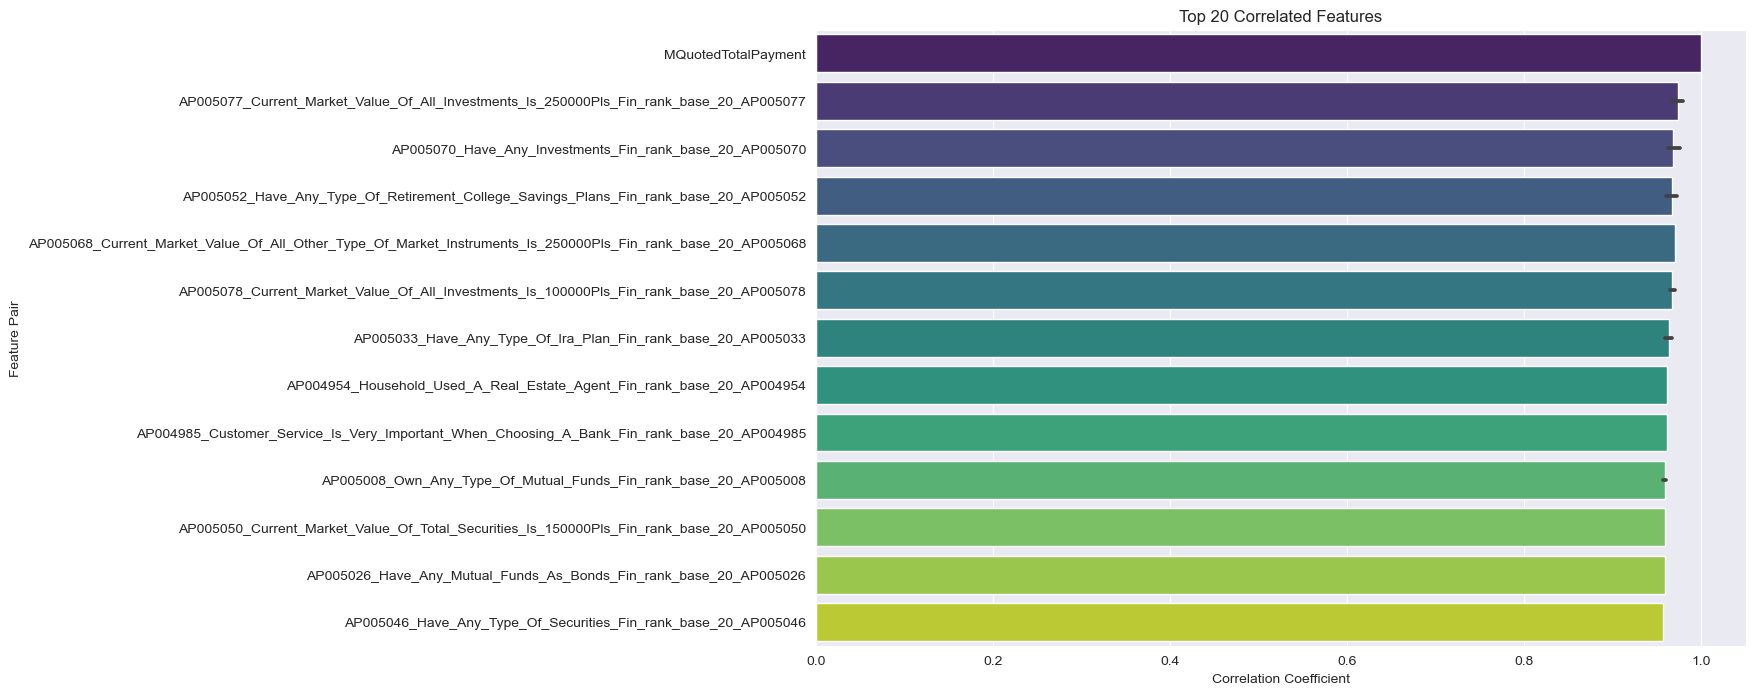

In [63]:
numeric_columns = merged_MQ_df.select_dtypes(include=['number'])
corr_matrix = numeric_columns.corr()

# Get the top 20 correlated features
top_corr_features = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()[:20]

# Create a DataFrame with the top correlated features
top_corr_df = pd.DataFrame(top_corr_features, columns=['Correlation'])
top_corr_df.reset_index(inplace=True)

# Plot the top 20 correlated features
plt.figure(figsize=(12, 8))
sns.barplot(x='Correlation', y='level_0', data=top_corr_df, palette='viridis')
plt.title('Top 20 Correlated Features')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature Pair')
plt.show()

In [67]:
numeric_columns = merged_MQ_df.select_dtypes(include=['number'])
corr_matrix = numeric_columns.corr()

# Select the target column for correlation analysis
target_column = 'MQuotedTotalPayment'

# Get the top 20 correlated features with the target column
top_corr_features = corr_matrix[target_column].sort_values(ascending=False).head(21)[1:]  # Exclude the target column itself

# Display the top 20 correlated features
print("Top 20 predictors for", target_column)
print(top_corr_features)


Top 20 predictors for MQuotedTotalPayment
PolicyTerm                                                                                                                    0.267533
DriversActive                                                                                                                 0.207669
DriverCount                                                                                                                   0.152489
AP005335_Bank_with_US_Bank_Fin_rank_base_20_AP005335                                                                          0.119580
AP005127_Completely_Disagree_Happy_To_Use_The_Internet_To_Carry_Out_Day_To_Day_Banking_Trans_Fin_rank_base_20_AP005127        0.105778
AP005193_Drop_In_Bankers_Banking_Methods_Segment_Fin_rank_base_20_AP005193                                                    0.101839
AP005325_Shopped_with_a_US_Bank_Issued_Credit_Card_in_the_Last_12_Months_Fin_rank_base_20_AP005325                            0.097252
AP005175_Comp

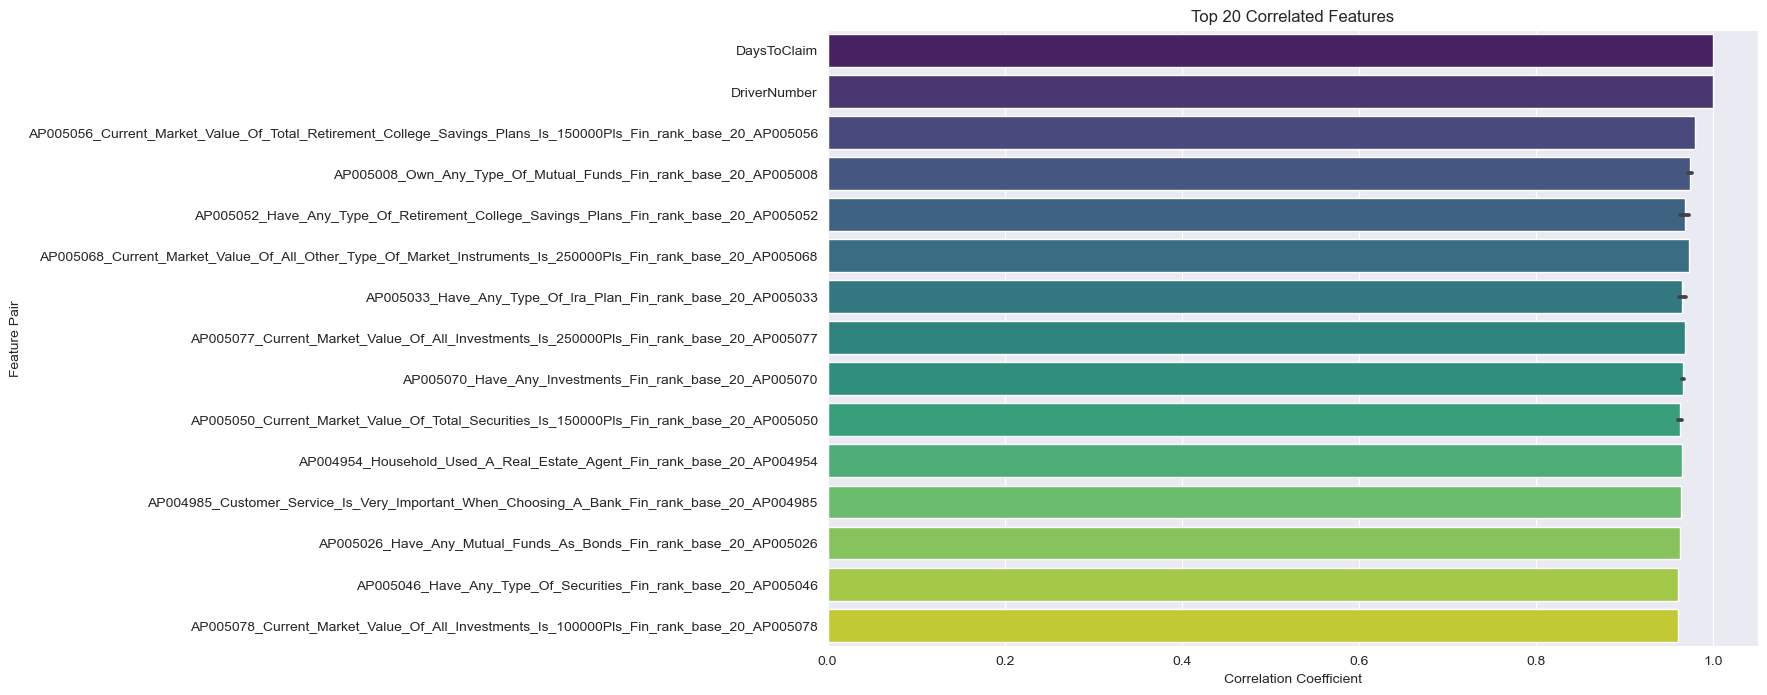

In [64]:
numeric_columns = merged_TG_df.select_dtypes(include=['number'])
corr_matrix = numeric_columns.corr()

# Get the top 20 correlated features
top_corr_features = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()[:20]

# Create a DataFrame with the top correlated features
top_corr_df = pd.DataFrame(top_corr_features, columns=['Correlation'])
top_corr_df.reset_index(inplace=True)

# Plot the top 20 correlated features
plt.figure(figsize=(12, 8))
sns.barplot(x='Correlation', y='level_0', data=top_corr_df, palette='viridis')
plt.title('Top 20 Correlated Features')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature Pair')
plt.show()